In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [2]:
data = pd.read_csv('C:/Users/v-aneog/Downloads/Advertising.csv',index_col = 0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Text(0, 0.5, 'Sales')

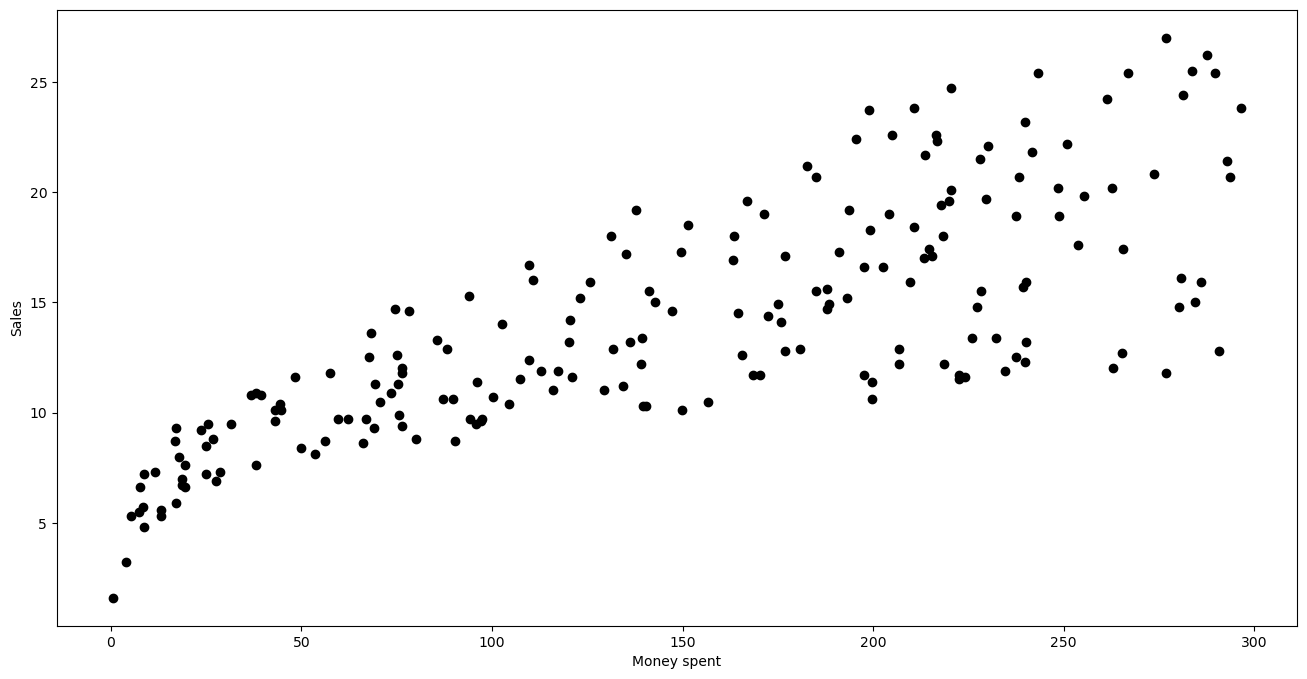

In [3]:
plt.figure(figsize=(16,8))
plt.scatter(data['TV'],data['sales'],c='black')
plt.xlabel('Money spent')
plt.ylabel('Sales')

In [5]:
X = data['TV'].values.reshape(-1,1)
Y = data['sales'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X,Y)
print(f"The linear model is: \n Y = {reg.intercept_[0]} + {reg.coef_[0] [0]}*TV")

The linear model is: 
 Y = 7.032593549127693 + 0.047536640433019764*TV


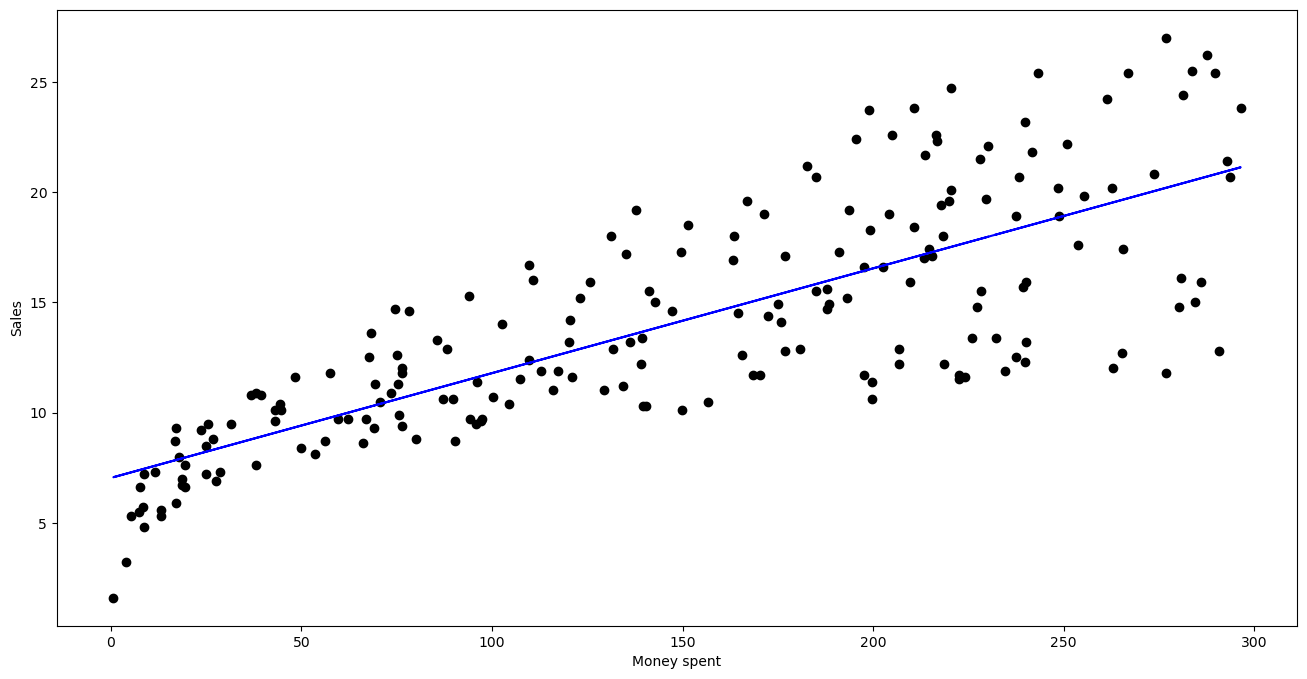

In [6]:
predictions = reg.predict(X)
plt.figure(figsize=(16,8))
plt.scatter(X,Y,c='black')
plt.plot(X, predictions, c='blue')
plt.xlabel('Money spent')
plt.ylabel('Sales')
plt.show()

In [7]:
X = data['TV']
Y = data['sales']
exog = sm.add_constant(X)
est = sm.OLS(Y,exog).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 02 May 2024   Prob (F-statistic):           1.47e-42
Time:                        00:09:26   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

In [10]:
Xs = data.drop(['sales'],axis=1)
Y = data['sales'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(Xs,Y)
print(f"The linear model is: \n Y = {reg.intercept_[0]} + {reg.coef_[0] [0]}*TV + {reg.coef_[0] [1]}*radio + {reg.coef_[0] [2]}*newspaper")

The linear model is: 
 Y = 2.9388893694594067 + 0.04576464545539761*TV + 0.18853001691820462*radio + -0.0010374930424763159*newspaper


In [11]:
X = np.column_stack((data['TV'],data['radio'],data['newspaper']))
Y = data['sales'].values.reshape(-1,1)
exog = sm.add_constant(X)
est = sm.OLS(Y,exog).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 02 May 2024   Prob (F-statistic):           1.58e-96
Time:                        00:20:42   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0